<a href="https://colab.research.google.com/github/Hegazian/Deep_Learning/blob/master/MINIST_deep_Neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [2]:
np.random.seed(0)

In [3]:
(x_train , y_train),(x_test , y_test) = mnist.load_data()

In [4]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
assert(x_train.shape[0] == y_train.shape[0])
assert(x_test.shape[0] == y_test.shape[0])
assert(x_train.shape[1:] == (28,28))
assert(x_test.shape[1:] == (28,28))

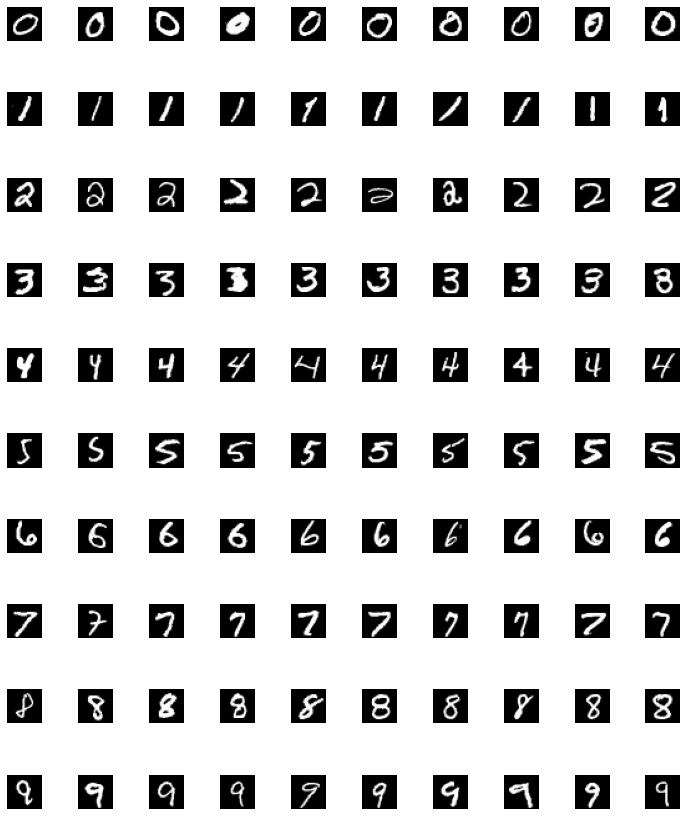

In [6]:
num_samples=[]
cols = 10
num_classes = 10
fig,axis = plt.subplots(nrows=num_classes,ncols=cols,figsize=(10,12))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = x_train[y_train == j]
    axis[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap=plt.get_cmap("gray"))
    axis[j][i].axis("off")

In [7]:
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
num_pexils = 28*28
x_test = x_test.reshape(x_test.shape[0],num_pexils)
x_train = x_train.reshape(x_train.shape[0],num_pexils)
print(x_test.shape)
print(x_train.shape)

(10000, 784)
(60000, 784)


In [10]:
def creat_model():
  model = Sequential()
  model.add(Dense(10,activation='relu',input_dim = num_pexils))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [11]:
model = creat_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,290
Trainable params: 8,290
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
h= model.fit(x_train,y_train,validation_split=0.1,batch_size=200,epochs=10,verbose=1,shuffle='True')

Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 0.6171 - accuracy: 0.8070 - val_loss: 0.3088 - val_accuracy: 0.9092
Epoch 2/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.9050 - val_loss: 0.2440 - val_accuracy: 0.9295
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2887 - accuracy: 0.9139 - val_loss: 0.2408 - val_accuracy: 0.9280
Epoch 4/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2710 - accuracy: 0.9193 - val_loss: 0.2297 - val_accuracy: 0.9323
Epoch 5/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2662 - accuracy: 0.9204 - val_loss: 0.2078 - val_accuracy: 0.9365
Epoch 6/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2548 - accuracy: 0.9250 - val_loss: 0.2407 - val_accuracy: 0.9272
Epoch 7/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2504 - accuracy: 0.9250 - val_loss: 0.2075 - val_accuracy: 0.9368
Epoch 

Text(0.5, 0, 'epoches')

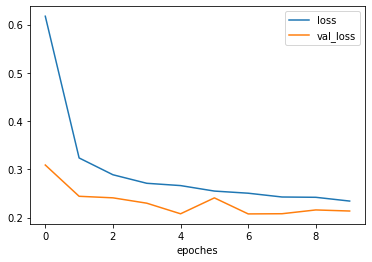

In [13]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(["loss", "val_loss"])
plt.xlabel("epoches")

Text(0.5, 0, 'epoches')

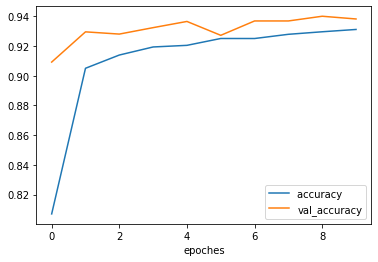

In [14]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy ', 'val_accuracy'])
plt.xlabel("epoches")

In [15]:
score = model.evaluate(x_test,y_test,verbose=0)
print("test score:",score[0])
print("test accuracy:", score[1])

test score: 0.26171982288360596
test accuracy: 0.92330002784729


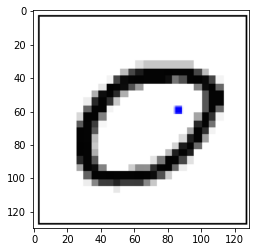

In [16]:
import requests
from PIL import Image
url2 = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-3.png'
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
url3 = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-1.png'
response = requests.get(url3,stream='True')
response2 = requests.get(url3,stream='True')
img = Image.open(response2.raw)
plt.imshow(img)

In [17]:
img_array = np.asarray(img)
print (img_array.shape)

(130, 129, 3)


(28, 28)


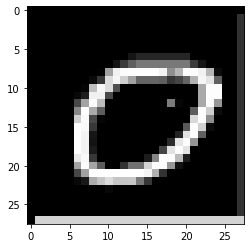

In [18]:
import cv2 
resized = cv2.resize(img_array,(28,28))
grey_scale = cv2.cvtColor(resized , cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(grey_scale)
print (image.shape)
plt.imshow(image, cmap=plt.get_cmap("gray"),)

In [19]:
image = image /255
image = image.reshape(1,784)


In [20]:
predication = model.predict_classes(image)
print("predicted digit is:",str(predication))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predicted digit is: [0]
